## Notebook2, Submission 2
I will look at more parameters to add to my multiple linear regression and create a stronger predictive model to submit to Kaggle

In [1]:
#Import all the libraries again
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
import warnings; warnings.simplefilter('ignore')

In [2]:
#Import datasets, but use the ones I've already cleaned slightly. Any new cleaning I do will be saved as another dataset
train1 = pd.read_csv('./datasets/train1.csv')
test1= pd.read_csv('./datasets/test.csv')

In [3]:
train1.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
#Set the ID column to be the index
train1.set_index('Id', inplace=True)

In [5]:
test1.set_index('Id', inplace=True)

## First Round Features
features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF']

## Features Added This Submission
    Qual_Cond: 'Overall Qual * Overall Cond'
    Year Built (0.57)
    Full Bath  (0.54)
    TotRms AbvGr (0.5) 
    Garage Yr Blt  (0.53)
    

In [6]:
#Create the new columns of Overall Quality * Overall Condition
#I decided to do this because quality and condition seem like they would work together and they both had fairly high correlations to sale price
#I wanted to see if multiplying them made a stronger impact
train1['Qual_Cond'] = train1['Overall Qual']*train1['Overall Cond']
train1['Qual_Cond']

Id
109     48
544     35
153     35
318     25
255     48
        ..
1587    40
785     20
916     36
639     20
10      35
Name: Qual_Cond, Length: 2049, dtype: int64

In [7]:
#Check types and null values for each of the new columns I will use
train1['Qual_Cond'].dtypes

dtype('int64')

In [8]:
train1['Qual_Cond'].isnull().sum()

0

In [9]:
train1['Year Built'].dtypes

dtype('int64')

In [10]:
train1['Year Built'].isnull().sum()

0

In [11]:
train1['Full Bath'].dtypes

dtype('int64')

In [12]:
train1['Full Bath'].isnull().sum()

0

In [13]:
features_test = train1[['Qual_Cond', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath', 'SalePrice']]

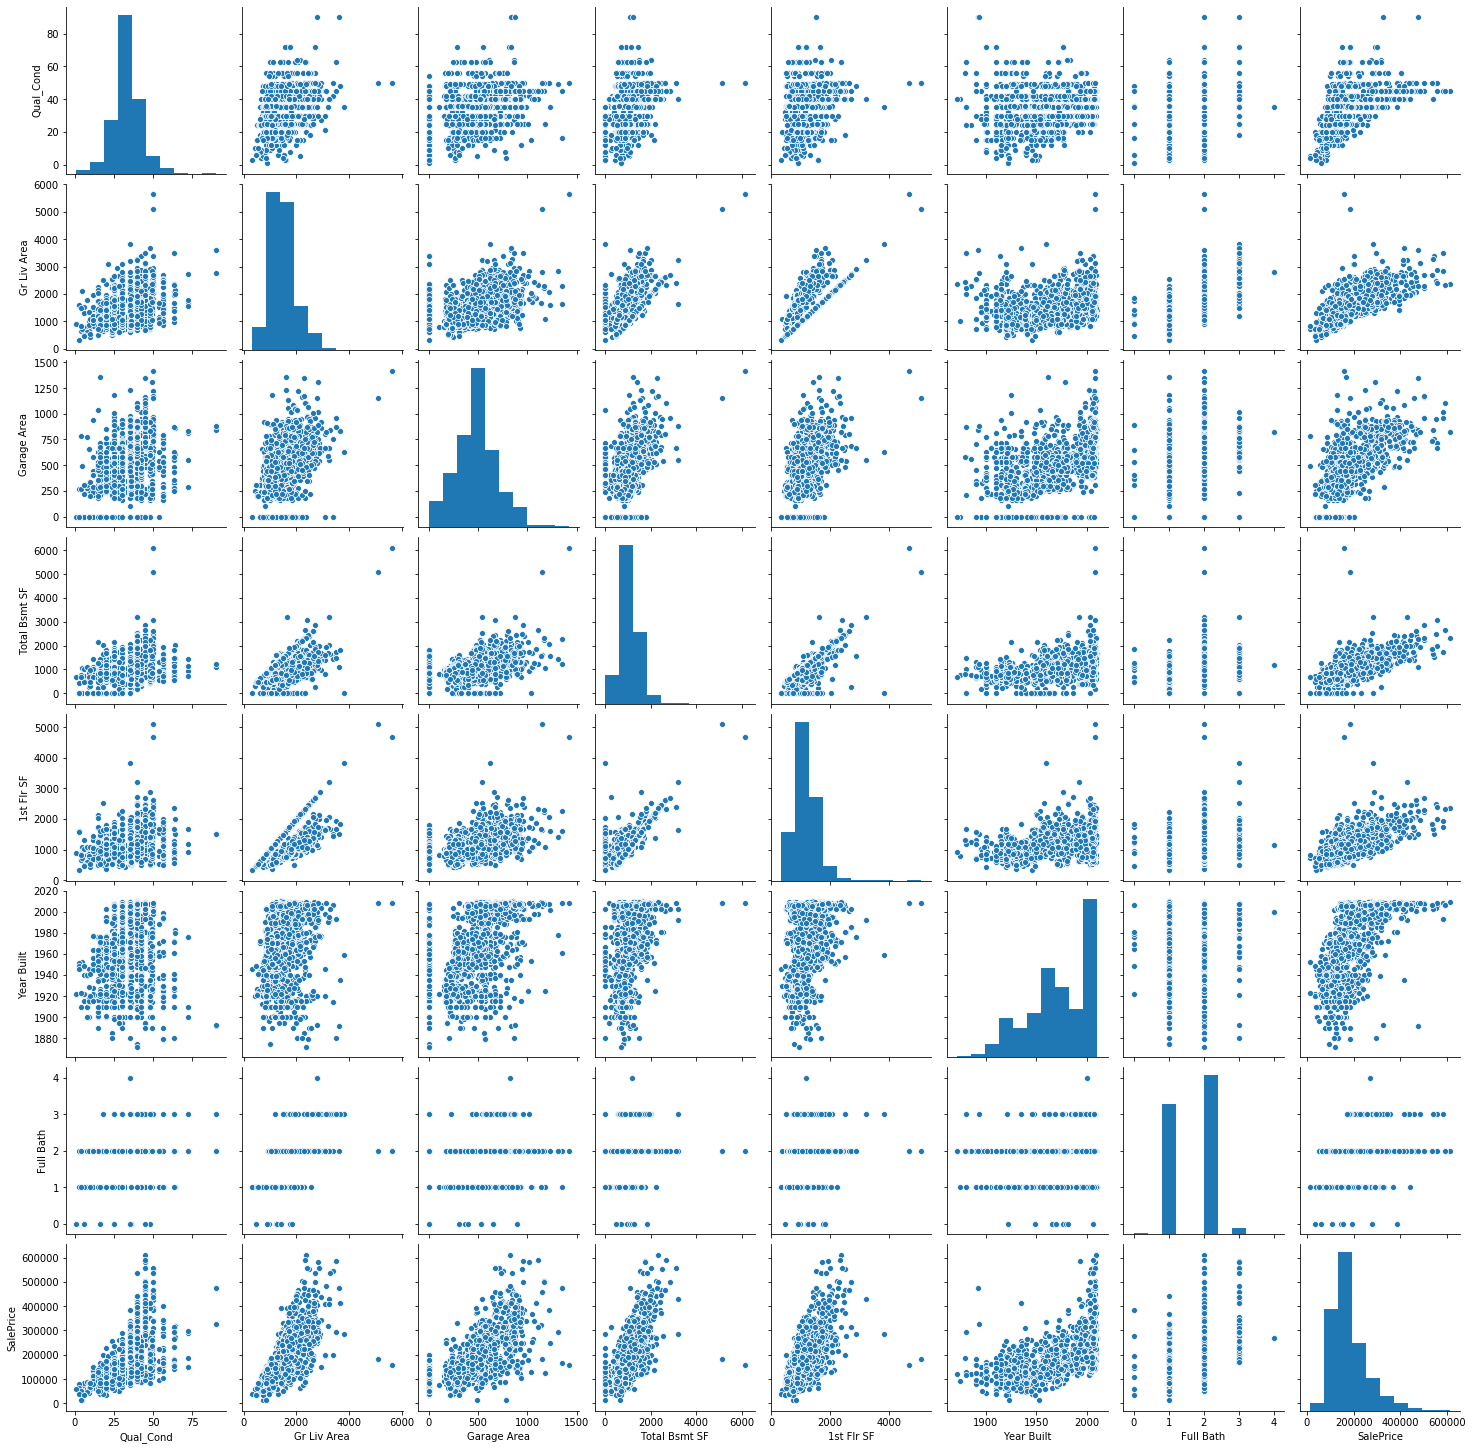

In [14]:
#Make a pair plot to see how each individual column interacts with Sale Price
sns.pairplot(features_test);

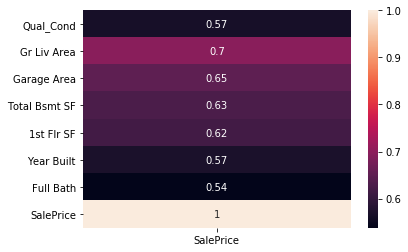

In [15]:
#Make a heat map to see the correlation of each column on Sale Price
sns.heatmap(features_test.corr()[['SalePrice']], annot = True );

In [16]:
#remove 'Qual_Cond' it has a lower correlation than just 'Overall Qual'
features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath']
X = train1[features]
y = train1['SalePrice']
lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
#Using the same functions I used last notebook. I will continue to use these each time to check my model and see how the metrics improve
def r2_adj(x, y, k):
    lr = LinearRegression()
    lr.fit(x, y)
    null_pred=y.mean()
    null_resids = y-null_pred
    null_sse = (null_resids**2).sum()
    pred = lr.predict(x)
    resids = y - pred
    sse=(resids**2).sum()
    r2 = 1-((sse) / (null_sse))
    n = len(y)
    r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)
    return r2_adj
#from lab 3.01, used in Sub 1 too

In [18]:
def run_metrics(x,y, k):
    lr = LinearRegression()
    lr.fit(x, y)
    pred = lr.predict(x)
    
    resids = y - pred
    r2 = lr.score(x,y)
    mae = metrics.mean_absolute_error(y, pred)
    sse = (resids**2).sum()
    rmse = metrics.mean_squared_error(y, pred, squared=False)
    mse = metrics.mean_squared_error(y, pred)
    r2a = r2_adj(x,y,k)
    print(f'Mean Adjusted errors: {mae}')
    print(f'Sum Squared Errors: {sse}')
    print(f'Mean Square Errors: {mse}' )
    print(f'Root Mean Square Errors: {rmse}')
    print(f'R2: {r2}')
    print(f'Adjusted R2: {r2a}')
#Lab 3.01 and submission1

In [19]:
run_metrics(X, y, 7)

Mean Adjusted errors: 23911.53961960501
Sum Squared Errors: 2738920765120.904
Mean Square Errors: 1336710963.943828
Root Mean Square Errors: 36561.05802549795
R2: 0.787128154867517
Adjusted R2: 0.7863980701463374


In [20]:
#RMSE is down slightly from Sub 1 (~37000) but lets add a few more features before submitting again to try to get it even lower!


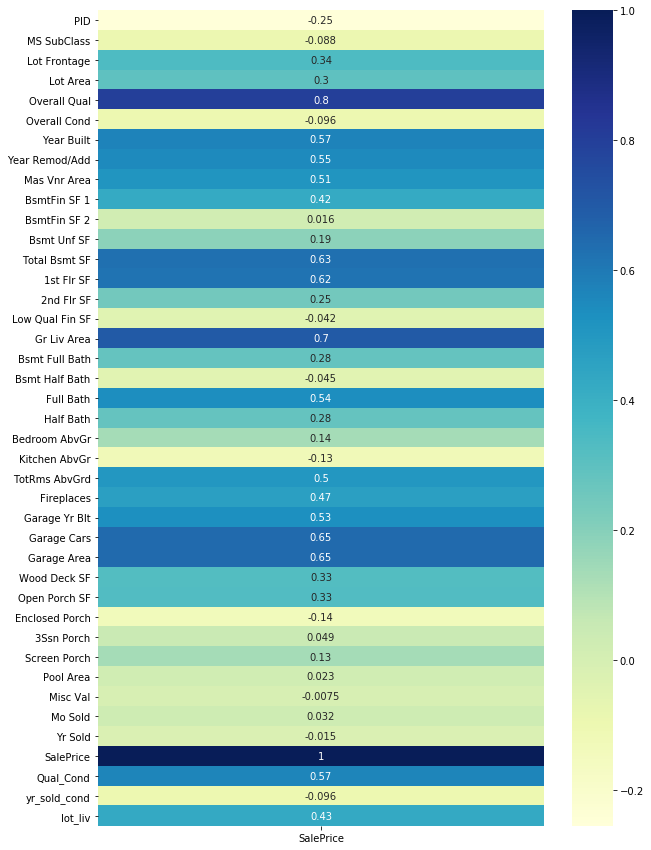

In [21]:
#Yr sold and overall cond both have negative correlations - maybe multiplying them can make a strong positive corr?
#Lets also try Lot area*living area
train1['yr_sold_cond'] = train1['Yr Sold']*train1['Overall Cond']
train1['lot_liv'] = train1['Lot Area']*train1['Gr Liv Area']
plt.figure(figsize=(10,15))
sns.heatmap(train1.corr()[['SalePrice']], annot = True, cmap='YlGnBu');

In [22]:
features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath', 'Qual_Cond', 'lot_liv']
X = train1[features]
run_metrics(X,y,9)

Mean Adjusted errors: 23505.265117060422
Sum Squared Errors: 2684249454728.1484
Mean Square Errors: 1310029016.460785
Root Mean Square Errors: 36194.32298663403
R2: 0.7913772674622739
Adjusted R2: 0.7904564216590176


In [23]:
train1['Garage Yr Blt'].isnull().sum()

113

In [25]:
train1[train1['Garage Yr Blt'].isnull()]['Garage Type'].isnull().sum()

113

In [26]:
train1['Garage Yr Blt'].fillna(value=0, inplace=True)

In [27]:
train1['TotRms AbvGrd'].isnull().sum()

0

In [28]:
#Make sure there are no more null features
train1[features].isnull().sum()

Overall Qual     0
Gr Liv Area      0
Garage Area      0
Total Bsmt SF    0
1st Flr SF       0
Year Built       0
Full Bath        0
Qual_Cond        0
lot_liv          0
dtype: int64

In [29]:
features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath', 
            'Qual_Cond', 'lot_liv', 'TotRms AbvGrd', 'Garage Yr Blt', 'Overall Cond', 'Kitchen AbvGr']
X = train1[features]
run_metrics(X,y,13)

Mean Adjusted errors: 22942.349382191016
Sum Squared Errors: 2594366665270.7656
Mean Square Errors: 1266162354.9393682
Root Mean Square Errors: 35583.17516663414
R2: 0.7983630537913659
Adjusted R2: 0.7970749553634975


In [30]:
pd.set_option('max_rows', None)
pd.set_option('max_columns', None)
train1.isnull().sum().sort_values()
#The RMSE is better, but I would still like to lower it more
#To be completely honest, I'm trying to find columns without any nulls so that way I dont have to worry about dropping them or altering my data
#I want the data to be as realistic as possible
#I'm also just trying to add a few extra numerical columns to see what they do

PID                   0
Kitchen Qual          0
Kitchen AbvGr         0
Bedroom AbvGr         0
Half Bath             0
Full Bath             0
Gr Liv Area           0
TotRms AbvGrd         0
Low Qual Fin SF       0
1st Flr SF            0
Electrical            0
yr_sold_cond          0
Heating QC            0
Heating               0
Total Bsmt SF         0
2nd Flr SF            0
Functional            0
Fireplaces            0
Garage Yr Blt         0
Qual_Cond             0
SalePrice             0
Sale Type             0
Yr Sold               0
Mo Sold               0
Misc Val              0
Pool Area             0
Screen Porch          0
3Ssn Porch            0
Enclosed Porch        0
Open Porch SF         0
Wood Deck SF          0
Paved Drive           0
Garage Area           0
Garage Cars           0
Bsmt Unf SF           0
BsmtFin SF 2          0
Central Air           0
BsmtFin SF 1          0
Overall Qual          0
Bldg Type             0
Condition 2           0
Condition 1     

In [31]:
features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath', 
            'Qual_Cond', 'lot_liv', 'TotRms AbvGrd', 'Garage Yr Blt', 'Overall Cond', 'Kitchen AbvGr', 'Bedroom AbvGr']
X = train1[features]
run_metrics(X,y,14)
#I'll add Bedroom AbvGr

Mean Adjusted errors: 22435.789042162858
Sum Squared Errors: 2543332921245.2773
Mean Square Errors: 1241255696.0689495
Root Mean Square Errors: 35231.458897822406
R2: 0.8023294508456614
Adjusted R2: 0.8009688865938617


In [32]:
#Instantiate regression model and create test/train data 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
lr = LinearRegression()
lr.fit(X_train, y_train)
print(f'Train RMSE {metrics.mean_squared_error(y_train, lr.predict(X_train), squared=False)}')
print(f'Test RMSE {metrics.mean_squared_error(y_test, lr.predict(X_test), squared=False)}')

Train RMSE 35746.96515629342
Test RMSE 33411.38255223552


In [33]:
test = pd.read_csv('./datasets/test.csv')
test.set_index('Id', inplace=True)
test['yr_sold_cond'] = test['Yr Sold']*test['Overall Cond']
test['lot_liv'] = test['Lot Area']*test['Gr Liv Area']
test['Qual_Cond'] = test['Overall Qual']*test['Overall Cond']
test['Garage Yr Blt'].fillna(value=1980.0, inplace=True)
test_df = test.loc[:,['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath', 'Qual_Cond', 
                   'lot_liv', 'TotRms AbvGrd', 'Garage Yr Blt', 'Overall Cond', 'Kitchen AbvGr', 'Bedroom AbvGr']] #Noah's sample
#Multiplying a few columns with lower correlations to see if that improves the model

In [34]:
test.isnull().sum()

PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       160
Lot Area             0
Street               0
Alley              820
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type         1
Mas Vnr Area         1
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           25
Bsmt Cond           25
Bsmt Exposure       25
BsmtFin Type 1      25
BsmtFin SF 1         0
BsmtFin Type 2      25
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
Heating              0
Heating QC           0
Central Air          0
Electrical           1
1st Flr SF 

In [35]:
#Predict the sale price with the new model
test_df['SalePrice'] = lr.predict(test_df)
test.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,yr_sold_cond,lot_liv,Qual_Cond
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD,16048,17625776,48
2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,8024,19005154,20
2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,10030,25587584,35
1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD,12042,8247360,30
625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD,10045,13243000,30


In [36]:
#Create and save my new output
#Also save the work done on the train and test datasets
output2 = test_df[['SalePrice']]
output2.to_csv('./datasets/dana_submission_2.csv')
train1.to_csv('./datasets/train2.csv')
test.to_csv('./datasets/test1.csv')

In [37]:
#Create my data dictionary
features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath', 'Qual_Cond', 
                   'lot_liv', 'TotRms AbvGrd', 'Garage Yr Blt', 'Overall Cond', 'Kitchen AbvGr', 'Bedroom AbvGr']
train1_coefs = train1[features]
train1_coefs.head()
coefs = pd.DataFrame({'column': train1_coefs.columns, 'coef': lr.coef_})
coefs

,column,coef
0,Overall Qual,19868.952258
1,Gr Liv Area,48.476501
2,Garage Area,60.978659
3,Total Bsmt SF,15.016005
4,1st Flr SF,17.037675
5,Year Built,462.090658
6,Full Bath,1057.926078
7,Qual_Cond,-411.295734
8,lot_liv,-0.000157
9,TotRms AbvGrd,4572.899912


## Summary
I added a few more parameters to the multiple linear regression model. Some of them were columns of continutous data with high correlations to the Sale Price (this includes Year Built and Garage Year Built). I also multipled a few columns to create stronger paramters and added those to the models.

I spilt my data into train and test data and then predicted sale price for my second submission